In [1109]:
import numpy as np 
import pandas as pd

In [1110]:
titanic_set = pd.read_csv('train.csv')

In [1111]:
titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analysing Dataset

In [1112]:
titanic_set.shape

(891, 12)

In [1113]:
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1114]:
titanic_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1115]:
titanic_set = titanic_set.drop(columns="Cabin", axis=1)

In [1116]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer_2 = SimpleImputer(strategy='most_frequent')

In [1117]:
titanic_set["Age"] = imputer.fit_transform(titanic_set["Age"].values.reshape(-1, 1))

In [1118]:
titanic_set["Embarked"] = imputer_2.fit_transform(titanic_set["Embarked"].values.reshape(-1, 1))

In [1119]:
titanic_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Making variables

In [1120]:
titanic_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1121]:
shuffle_index = np.random.permutation(891)

titanic_set = titanic_set.iloc[shuffle_index]

In [1122]:
correlation = titanic_set.corr()

correlation["Survived"].sort_values(ascending=False)

C:\Users\Sanchari Adhya\AppData\Local\Temp\ipykernel_18380\1061133614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic_set.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>],
       [<Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>],
       [<Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>]], dtype=object)

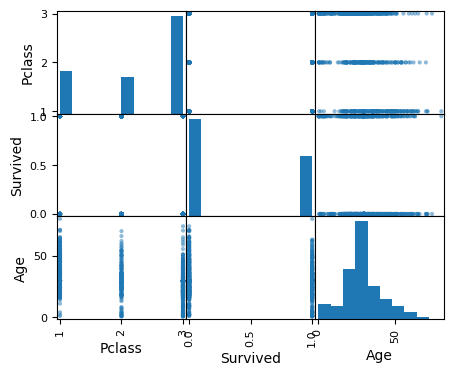

In [1123]:
from pandas.plotting import scatter_matrix
attributes = ["Sex", "Pclass", "Survived", "Age"]

scatter_matrix(titanic_set[attributes], figsize=(5, 4))

In [1124]:
titanic_set.replace({'Sex':{'male': 0, 'female': 1}, 'Embarked':{'S': 0, 'C': 0, 'P': 1, 'Q': 1}}, inplace=True)

In [1125]:
titanic_set["Embarked"]

670    0
509    0
876    0
430    0
228    0
      ..
543    0
785    0
314    0
339    0
246    0
Name: Embarked, Length: 891, dtype: int64

In [1126]:
correlation = titanic_set.corr()

correlation["Survived"].sort_values(ascending=False)

C:\Users\Sanchari Adhya\AppData\Local\Temp\ipykernel_18380\1061133614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic_set.corr()


Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
Embarked       0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

In [1127]:
titanic_features = titanic_set.drop(columns=["Survived", "PassengerId", "Name", "Ticket"], axis=1)
titanic_labels = titanic_set["Survived"]

Train-Test-Splitting

Training the Model


In [1128]:
from sklearn.model_selection import train_test_split

titanic_train_features, titanic_test_features, titanic_train_labels,titanic_test_labels = train_test_split(titanic_features, titanic_labels, test_size=0.2, random_state=42)

In [1129]:
titanic_features.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=35, max_leaf_nodes=35, n_estimators=75, max_features=20)

clf.fit(titanic_train_features, titanic_train_labels)

RandomForestClassifier(max_depth=35, max_features=20, max_leaf_nodes=35,
                       n_estimators=75)

In [1131]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, titanic_train_features, titanic_train_labels, cv = k_folds)


In [1132]:
rmse_scores = np.sqrt(scores)

rmse_scores

array([0.92365949, 0.90066021, 0.89206202, 0.90771343, 0.91927712])

In [1133]:
titanic_predicted_labels = clf.predict(titanic_train_features)

In [1134]:
from sklearn.metrics import log_loss

log_loss = log_loss(titanic_train_labels, titanic_predicted_labels, eps = 1e-15, normalize = True, sample_weight = None, labels = None)

In [1135]:
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores.mean())
print("Standard Deviation: ", rmse_scores.std())
print("Log Loss:", log_loss)

Scores:  [0.92365949 0.90066021 0.89206202 0.90771343 0.91927712]
Mean:  0.90867445262319
Standard Deviation:  0.01164553545150084
Log Loss: 2.81356885514926


In [1136]:
titanic_test_predictions = clf.predict(titanic_test_features)

In [1137]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(titanic_test_predictions, titanic_test_labels)
accuracy

0.8435754189944135

In [1138]:
from joblib import load, dump

dump(dump, 'rfc_model.joblib')

['rfc_model.joblib']

Predicting Test Data

In [1139]:
test_data = pd.read_csv('test.csv')


In [1140]:
test_data = test_data.drop(columns="Cabin", axis=1)

test_data["Age"] = imputer.fit_transform(test_data["Age"].values.reshape(-1, 1))
test_data["Embarked"] = imputer_2.fit_transform(test_data["Embarked"].values.reshape(-1, 1))

test_data.replace({'Sex':{'male': 0, 'female': 1}, 'Embarked':{'S': 0, 'C': 0, 'P': 1, 'Q': 1}}, inplace=True)

test_data = test_data.drop(columns=["PassengerId", "Name", "Ticket"], axis=1)


In [1147]:
test_data["Fare"].fillna(method="ffill", inplace=True)

test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1148]:
test_predictions = clf.predict(test_data)

In [1149]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1151]:
predictions = pd.DataFrame(test_predictions)

predictions.to_csv('Test_Predictions.csv', index=False)